# Time Series Data Manipulation

In [133]:
import os
import pandas as pd
from matplotlib import pyplot
from datetime import datetime as dt

## Basic Data Import

In [2]:
dirc = "/Users/sriharshamanjunath/Documents/GitHub/Datasets/"

In [3]:
# Loading the data
series = pd.read_csv(dirc+'daily-total-female-births.csv', \
                     header=0,parse_dates=[0], index_col=0, \
                     squeeze=True) 
print(type(series)) 
print(series.head())

<class 'pandas.core.series.Series'>
Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Births, dtype: int64


In [4]:
print(series.describe())

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: Births, dtype: float64


## Basic Feature Engineering

In [5]:
series = pd.read_csv(dirc+'daily-min-temperatures.csv', \
                     header=0,parse_dates=[0], index_col=0, \
                     squeeze=True) 

### 1. Date Time Features
Nevertheless, this information coupled with additional engineered features may ultimately result in a better model. You may enumerate all the properties of a time-stamp and consider what might be useful for your problem, such as:
- 􏰀 Minutes elapsed for the day. 􏰀 Hour of day.
- 􏰀 Business hours or not.
- 􏰀 Weekend or not.
-  Season of the year.
- 􏰀 Business quarter of the year. 􏰀 Daylight savings or not.
- 􏰀 Public holiday or not.
- 􏰀 Leap year or not.

Considering all these might lead to a better model

In [6]:
df = pd.DataFrame()
df['month'] = [series.index[i].month for i in range(len(series))]
df['day'] = [series.index[i].day for i in range(len(series))]
df['temperature'] = [series[i] for i in range(len(series))]
df.head()

,month,day,temperature
0,1,1,20.7
1,1,2,17.9
2,1,3,18.8
3,1,4,14.6
4,1,5,15.8


### Lag Features

In [7]:
series = pd.read_csv(dirc+'daily-min-temperatures.csv', header=0)
temps = pd.DataFrame(series.values)
df = pd.concat([temps[1].shift(3), temps[1].shift(2), temps[1].shift(1), temps[1]], axis=1) 
df.columns = ['t-2', 't-1', 't', 't+1']
print(df.head(10))

    t-2   t-1     t   t+1
0   NaN   NaN   NaN  20.7
1   NaN   NaN  20.7  17.9
2   NaN  20.7  17.9  18.8
3  20.7  17.9  18.8  14.6
4  17.9  18.8  14.6  15.8
5  18.8  14.6  15.8  15.8
6  14.6  15.8  15.8  15.8
7  15.8  15.8  15.8  17.4
8  15.8  15.8  17.4  21.8
9  15.8  17.4  21.8    20


### Rolling Window Statistics

In [9]:
series = pd.read_csv(dirc+'daily-min-temperatures.csv', header=0)
temps = pd.DataFrame(series.values)
shifted = temps[1].shift(1)
window = shifted.rolling(window=2)
means = window.mean()
dataframe = pd.concat([means, temps[1]], axis=1) 
dataframe.columns = ['mean(t-1,t)', 't+1'] 
print(dataframe.head(5))

   mean(t-1,t)   t+1
0          NaN  20.7
1          NaN  17.9
2        19.30  18.8
3        18.35  14.6
4        16.70  15.8


In [10]:
width = 3
shifted = temps[1].shift(width - 1)
window = shifted.rolling(window=width)
dataframe = pd.concat([window.min(), window.mean(), window.max(), temps[1]], axis=1) 
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head(10))

    min       mean   max   t+1
0   NaN        NaN   NaN  20.7
1   NaN        NaN   NaN  17.9
2   NaN        NaN   NaN  18.8
3   NaN        NaN   NaN  14.6
4  17.9  19.133333  20.7  15.8
5  14.6  17.100000  18.8  15.8
6  14.6  16.400000  18.8  15.8
7  14.6  15.400000  15.8  17.4
8  15.8  15.800000  15.8  21.8
9  15.8  16.333333  17.4    20


In [11]:
temps = pd.DataFrame(series.values)
window = temps[1].expanding()
dataframe = pd.concat([window.min(), window.mean(), window.max(), temps[1],temps[1].shift(-1)], axis=1) 
dataframe.columns = ['min', 'mean', 'max', 't', 't+1']
print(dataframe.head(10))

    min       mean   max     t   t+1
0  20.7  20.700000  20.7  20.7  17.9
1  17.9  19.300000  20.7  17.9  18.8
2  17.9  19.133333  20.7  18.8  14.6
3  14.6  18.000000  20.7  14.6  15.8
4  14.6  17.560000  20.7  15.8  15.8
5  14.6  17.266667  20.7  15.8  15.8
6  14.6  17.057143  20.7  15.8  17.4
7  14.6  17.100000  20.7  17.4  21.8
8  14.6  17.622222  21.8  21.8    20
9  14.6  17.860000  21.8    20  16.2


## Data Visualization

#### Line Plot

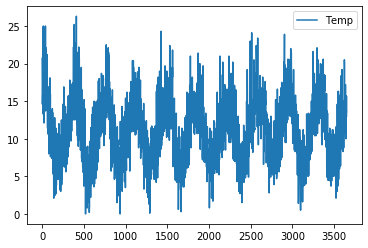

In [13]:
series = pd.read_csv(dirc+'daily-min-temperatures.csv', header=0)
series.plot()

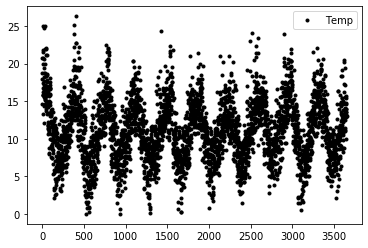

In [14]:
series = pd.read_csv(dirc+'daily-min-temperatures.csv', header=0)
series.plot(style = 'k.')

In [166]:
series = pd.read_csv(dirc+'daily-min-temperatures.csv', header=0)
series['Date'] = pd.to_datetime(series['Date'], format='%Y-%M-%d')

In [167]:
groups = series.groupby(pd.Grouper(key='Date', freq = 'D', axis = 0))

In [168]:
for i,j in groups:
    print(j)

                   Date  Temp
0   1981-01-01 00:01:00  20.7
31  1981-01-01 00:02:00  15.3
59  1981-01-01 00:03:00  17.8
90  1981-01-01 00:04:00  16.7
120 1981-01-01 00:05:00   8.6
151 1981-01-01 00:06:00  11.6
181 1981-01-01 00:07:00  10.7
212 1981-01-01 00:08:00   5.7
243 1981-01-01 00:09:00   8.0
273 1981-01-01 00:10:00   8.9
304 1981-01-01 00:11:00   9.2
334 1981-01-01 00:12:00  13.4
                   Date  Temp
1   1981-01-02 00:01:00  17.9
32  1981-01-02 00:02:00  18.8
60  1981-01-02 00:03:00  18.6
91  1981-01-02 00:04:00  16.8
121 1981-01-02 00:05:00  11.9
152 1981-01-02 00:06:00  10.6
182 1981-01-02 00:07:00  10.0
213 1981-01-02 00:08:00   7.7
244 1981-01-02 00:09:00  10.3
274 1981-01-02 00:10:00  13.2
305 1981-01-02 00:11:00  11.5
335 1981-01-02 00:12:00  10.5
                   Date  Temp
2   1981-01-03 00:01:00  18.8
33  1981-01-03 00:02:00  21.9
61  1981-01-03 00:03:00  17.0
92  1981-01-03 00:04:00  17.5
122 1981-01-03 00:05:00  14.0
153 1981-01-03 00:06:00   9.8
183 1981-0

Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date

Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date

Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date

1457 1984-01-28 00:12:00  12.6
                    Date  Temp
1123 1984-01-29 00:01:00  14.7
1154 1984-01-29 00:02:00  13.5
1183 1984-01-29 00:03:00  14.0
1214 1984-01-29 00:04:00   6.5
1244 1984-01-29 00:05:00  10.9
1275 1984-01-29 00:06:00   9.1
1305 1984-01-29 00:07:00   7.0
1336 1984-01-29 00:08:00   5.2
1367 1984-01-29 00:09:00   6.7
1397 1984-01-29 00:10:00  10.0
1428 1984-01-29 00:11:00  12.0
1458 1984-01-29 00:12:00  16.0
                    Date  Temp
1124 1984-01-30 00:01:00  13.1
1184 1984-01-30 00:03:00  15.3
1215 1984-01-30 00:04:00   9.6
1245 1984-01-30 00:05:00  10.0
1276 1984-01-30 00:06:00   9.4
1306 1984-01-30 00:07:00  10.0
1337 1984-01-30 00:08:00   9.0
1368 1984-01-30 00:09:00   4.2
1398 1984-01-30 00:10:00   8.5
1429 1984-01-30 00:11:00  11.0
1459 1984-01-30 00:12:00  16.4
                    Date  Temp
1125 1984-01-31 00:01:00  12.1
1185 1984-01-31 00:03:00  11.1
1246 1984-01-31 00:05:00   8.7
1307 1984-01-31 00:07:00  10.6
1338 1984-01-31 00:08:00  11.3
1399 198

Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
In

Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date

                    Date  Temp
1847 1986-01-23 00:01:00  13.5
1878 1986-01-23 00:02:00  13.1
1906 1986-01-23 00:03:00  16.5
1937 1986-01-23 00:04:00  11.6
1967 1986-01-23 00:05:00   9.6
1998 1986-01-23 00:06:00   5.7
2028 1986-01-23 00:07:00   9.4
2059 1986-01-23 00:08:00  12.4
2090 1986-01-23 00:09:00  10.6
2120 1986-01-23 00:10:00   5.2
2151 1986-01-23 00:11:00  11.5
2181 1986-01-23 00:12:00   9.7
                    Date  Temp
1848 1986-01-24 00:01:00  11.8
1879 1986-01-24 00:02:00  11.4
1907 1986-01-24 00:03:00  16.2
1938 1986-01-24 00:04:00  12.0
1968 1986-01-24 00:05:00  11.3
1999 1986-01-24 00:06:00   6.6
2029 1986-01-24 00:07:00  11.0
2060 1986-01-24 00:08:00  10.2
2091 1986-01-24 00:09:00   8.6
2121 1986-01-24 00:10:00   7.5
2152 1986-01-24 00:11:00  12.8
2182 1986-01-24 00:12:00  13.4
                    Date  Temp
1849 1986-01-25 00:01:00  15.3
1880 1986-01-25 00:02:00  12.5
1908 1986-01-25 00:03:00  16.1
1939 1986-01-25 00:04:00  11.5
1969 1986-01-25 00:05:00   8.5
2000 198

Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date

Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date

2898 1988-01-09 00:12:00  20.2
                    Date  Temp
2564 1988-01-10 00:01:00  17.4
2595 1988-01-10 00:02:00  12.1
2624 1988-01-10 00:03:00  14.5
2655 1988-01-10 00:04:00   7.9
2685 1988-01-10 00:05:00  11.0
2716 1988-01-10 00:06:00   8.2
2746 1988-01-10 00:07:00   7.6
2777 1988-01-10 00:08:00   9.1
2808 1988-01-10 00:09:00  13.2
2838 1988-01-10 00:10:00  12.3
2869 1988-01-10 00:11:00  11.9
2899 1988-01-10 00:12:00  14.3
                    Date  Temp
2565 1988-01-11 00:01:00  18.3
2596 1988-01-11 00:02:00  14.5
2625 1988-01-11 00:03:00  10.0
2656 1988-01-11 00:04:00  11.0
2686 1988-01-11 00:05:00  12.0
2717 1988-01-11 00:06:00   5.0
2747 1988-01-11 00:07:00  12.4
2778 1988-01-11 00:08:00   3.9
2809 1988-01-11 00:09:00  11.5
2839 1988-01-11 00:10:00  13.3
2870 1988-01-11 00:11:00  10.3
2900 1988-01-11 00:12:00  11.0
                    Date  Temp
2566 1988-01-12 00:01:00  18.3
2597 1988-01-12 00:02:00  16.3
2626 1988-01-12 00:03:00  12.6
2657 1988-01-12 00:04:00  15.7
2687 198

Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date

Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date, Temp]
Index: []
Empty DataFrame
Columns: [Date

In [173]:
for name, group in groups:
    years[name.year] = group.values
years.plot(subplots=True, legend=False) 
pyplot.show()

ValueError: Length of values does not match length of index

In [106]:
group.values

array([[Timestamp('1990-01-31 00:12:00'), 13.0]], dtype=object)

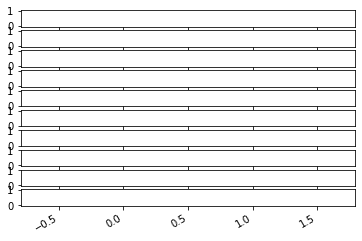

In [171]:
for i,j in groups:
    years[i.year] = j['Temp']
years.plot(subplots=True, legend=False) 
pyplot.show()

#### Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe185494a10>]],
      dtype=object)

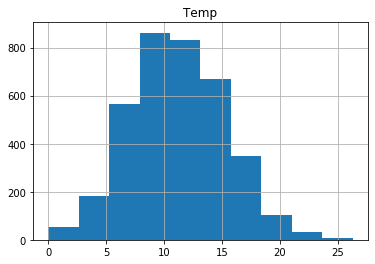

In [19]:
series.hist()

#### KDE

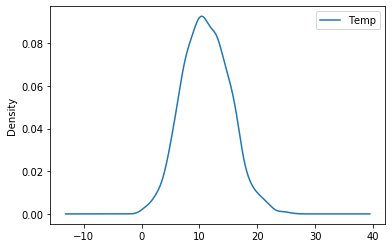

In [94]:
series = pd.read_csv(dirc+'daily-min-temperatures.csv', header=0)
series.plot(kind = 'kde')

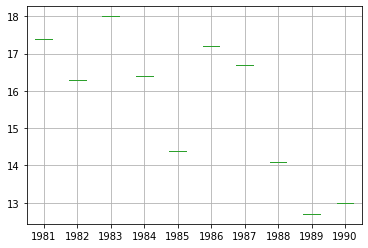

In [96]:
years.boxplot()
pyplot.show()

## Resampling & Interpolation

In [164]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

Month
1901-01-01    266.0
1901-01-02      NaN
1901-01-03      NaN
1901-01-04      NaN
1901-01-05      NaN
1901-01-06      NaN
1901-01-07      NaN
1901-01-08      NaN
1901-01-09      NaN
1901-01-10      NaN
1901-01-11      NaN
1901-01-12      NaN
1901-01-13      NaN
1901-01-14      NaN
1901-01-15      NaN
1901-01-16      NaN
1901-01-17      NaN
1901-01-18      NaN
1901-01-19      NaN
1901-01-20      NaN
1901-01-21      NaN
1901-01-22      NaN
1901-01-23      NaN
1901-01-24      NaN
1901-01-25      NaN
1901-01-26      NaN
1901-01-27      NaN
1901-01-28      NaN
1901-01-29      NaN
1901-01-30      NaN
1901-01-31      NaN
1901-02-01    145.9
Freq: D, Name: Sales, dtype: float64
Month
1901-01-01    266.000000
1901-01-02    262.125806
1901-01-03    258.251613
1901-01-04    254.377419
1901-01-05    250.503226
1901-01-06    246.629032
1901-01-07    242.754839
1901-01-08    238.880645
1901-01-09    235.006452
1901-01-10    231.132258
1901-01-11    227.258065
1901-01-12    223.383871
1901-01-13 

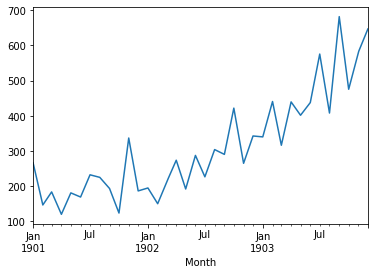

In [180]:
series = pd.read_csv(dirc+'shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
upsampled = series.resample('D').mean() 
print(upsampled.head(32))
interpolated = upsampled.interpolate(method='linear') 
print(interpolated.head(32))
interpolated.plot()
pyplot.show()

#### Spline Method

Month
1901-01-01    266.000000
1901-01-02    258.630160
1901-01-03    251.560886
1901-01-04    244.720748
1901-01-05    238.109746
1901-01-06    231.727880
1901-01-07    225.575149
1901-01-08    219.651553
1901-01-09    213.957094
1901-01-10    208.491770
1901-01-11    203.255582
1901-01-12    198.248529
1901-01-13    193.470612
1901-01-14    188.921831
1901-01-15    184.602185
1901-01-16    180.511676
1901-01-17    176.650301
1901-01-18    173.018063
1901-01-19    169.614960
1901-01-20    166.440993
1901-01-21    163.496161
1901-01-22    160.780465
1901-01-23    158.293905
1901-01-24    156.036481
1901-01-25    154.008192
1901-01-26    152.209039
1901-01-27    150.639021
1901-01-28    149.298139
1901-01-29    148.186393
1901-01-30    147.303783
1901-01-31    146.650308
1901-02-01    145.900000
Freq: D, Name: Sales, dtype: float64


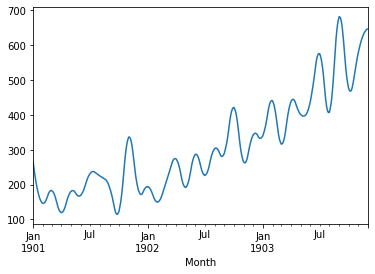

In [182]:
interpolated = upsampled.interpolate(method='spline', order=2) 
print(interpolated.head(32))
interpolated.plot()
pyplot.show()

#### Down Sampling - 

Month
1901-03-31    198.333333
1901-06-30    156.033333
1901-09-30    216.366667
1901-12-31    215.100000
1902-03-31    184.633333
Freq: Q-DEC, Name: Sales, dtype: float64


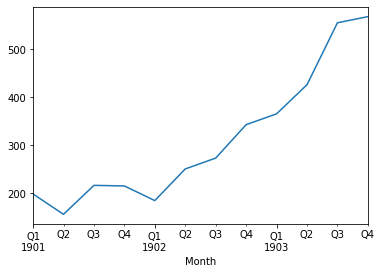

In [187]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = pd.read_csv(dirc+'shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
resample = series.resample('Q') 
quarterly_mean_sales = resample.mean() 
print(quarterly_mean_sales.head()) 
quarterly_mean_sales.plot() 
pyplot.show()

Month
1901-12-31    2357.5
1902-12-31    3153.5
1903-12-31    5742.6
Freq: A-DEC, Name: Sales, dtype: float64


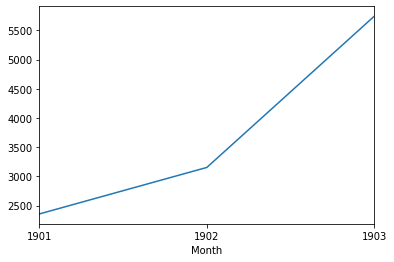

In [188]:
resample = series.resample('A') 
yearly_mean_sales = resample.sum() 
print(yearly_mean_sales.head()) 
yearly_mean_sales.plot() 
pyplot.show()